In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cust_df = pd.read_csv("Data\\Cust_spend_data.csv")

In [4]:
cust_df.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [7]:
cust_df = cust_df.iloc[:,2:]

In [8]:
from scipy.stats import zscore

In [9]:
scaled_df = zscore(cust_df)

In [13]:
cols = cust_df.columns
scaled_df = pd.DataFrame (scaled_df, columns = cols)

In [15]:
scaled_df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


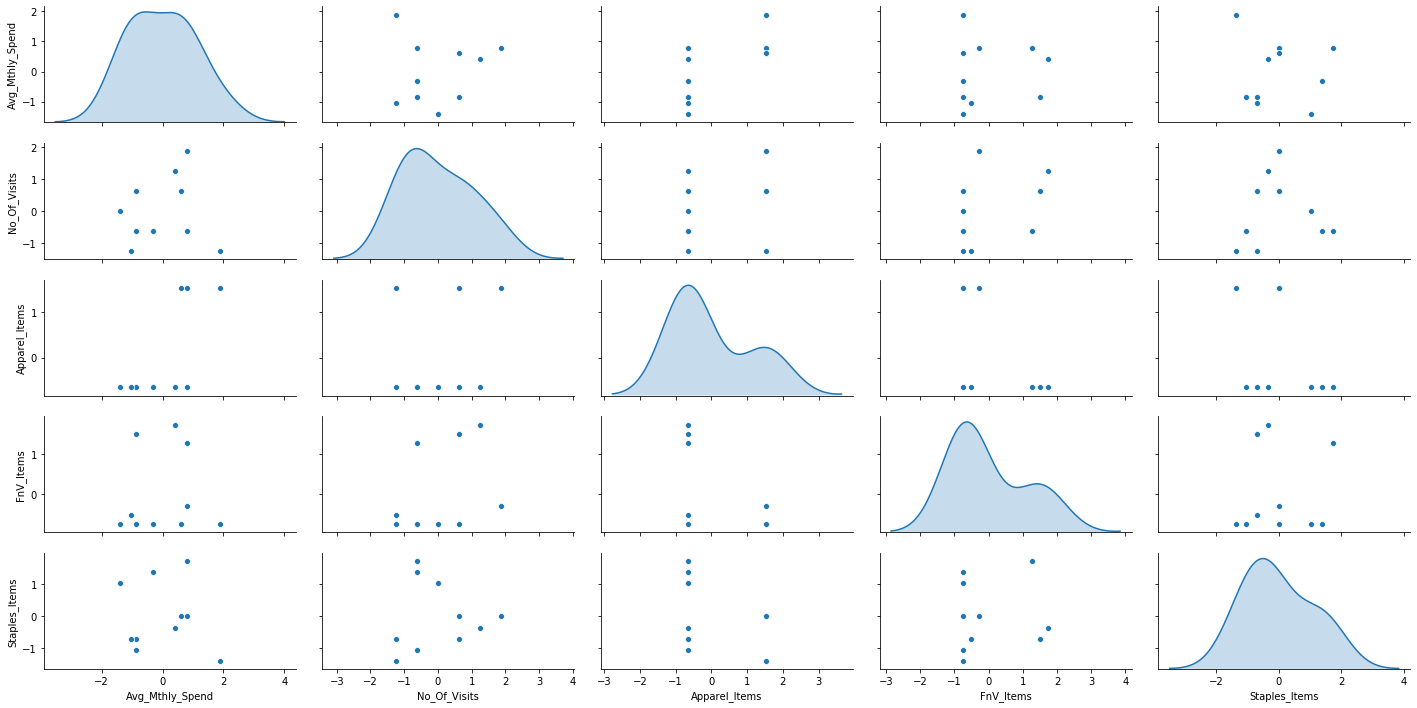

In [17]:
sns.pairplot(scaled_df, height = 2, aspect = 2, diag_kind = "kde")

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
agm = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "average")

In [20]:
agm.fit(scaled_df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [22]:
cust_df['labels'] = agm.labels_

In [23]:
cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1


In [24]:
cust_grouped = cust_df.groupby('labels')

In [26]:
cust_grouped.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [27]:
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from scipy.spatial.distance import pdist

In [28]:
z = linkage(scaled_df, metric = "euclidean", method = "average")
c, cop_dist = cophenet(z, pdist(scaled_df))

c

0.8681149436293064

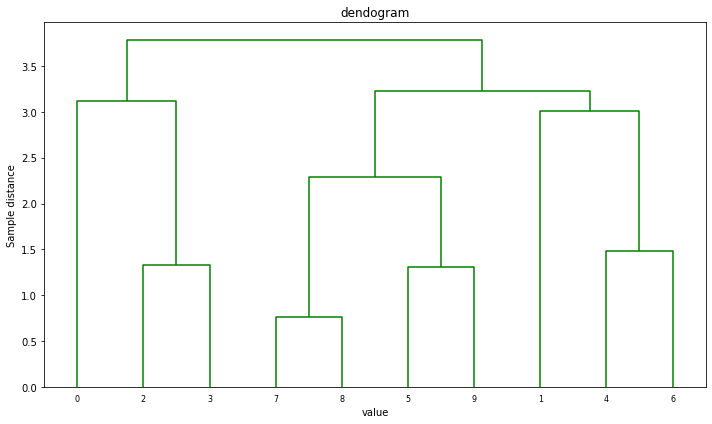

In [30]:
plt.figure(figsize = (10,6))
plt.title("dendogram")
plt.xlabel ("value")
plt.ylabel("Sample distance")
dendrogram(z, leaf_rotation= 0, color_threshold= 40, leaf_font_size=8)
plt.tight_layout()

In [31]:
auto_df = pd.read_csv("Data\\auto-mpg.csv")
auto_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [32]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [33]:
auto_df = auto_df.drop(["car name","origin"], axis = 1)

In [42]:
hp_digit = pd.DataFrame(auto_df.hp.str.isdigit(), columns = ["hp"])

In [45]:
hp_digit[hp_digit["hp"]==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [60]:
auto_df[auto_df["hp"].str.isdigit() == False]

,mpg,cyl,disp,hp,wt,acc,yr


In [59]:
def update_hp(hp):
    if (hp.isdigit()):
        return hp
    else:
        return 0
auto_df["hp"] = auto_df["hp"].apply(update_hp)

In [64]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
mpg     398 non-null float64
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null int32
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


In [63]:
auto_df["hp"] = auto_df["hp"].astype(int)

In [65]:
x = auto_df.drop("mpg",axis =1 )

In [66]:
cols = x.columns
x = pd.DataFrame(zscore(x), columns = cols)

In [67]:
y = auto_df["mpg"]

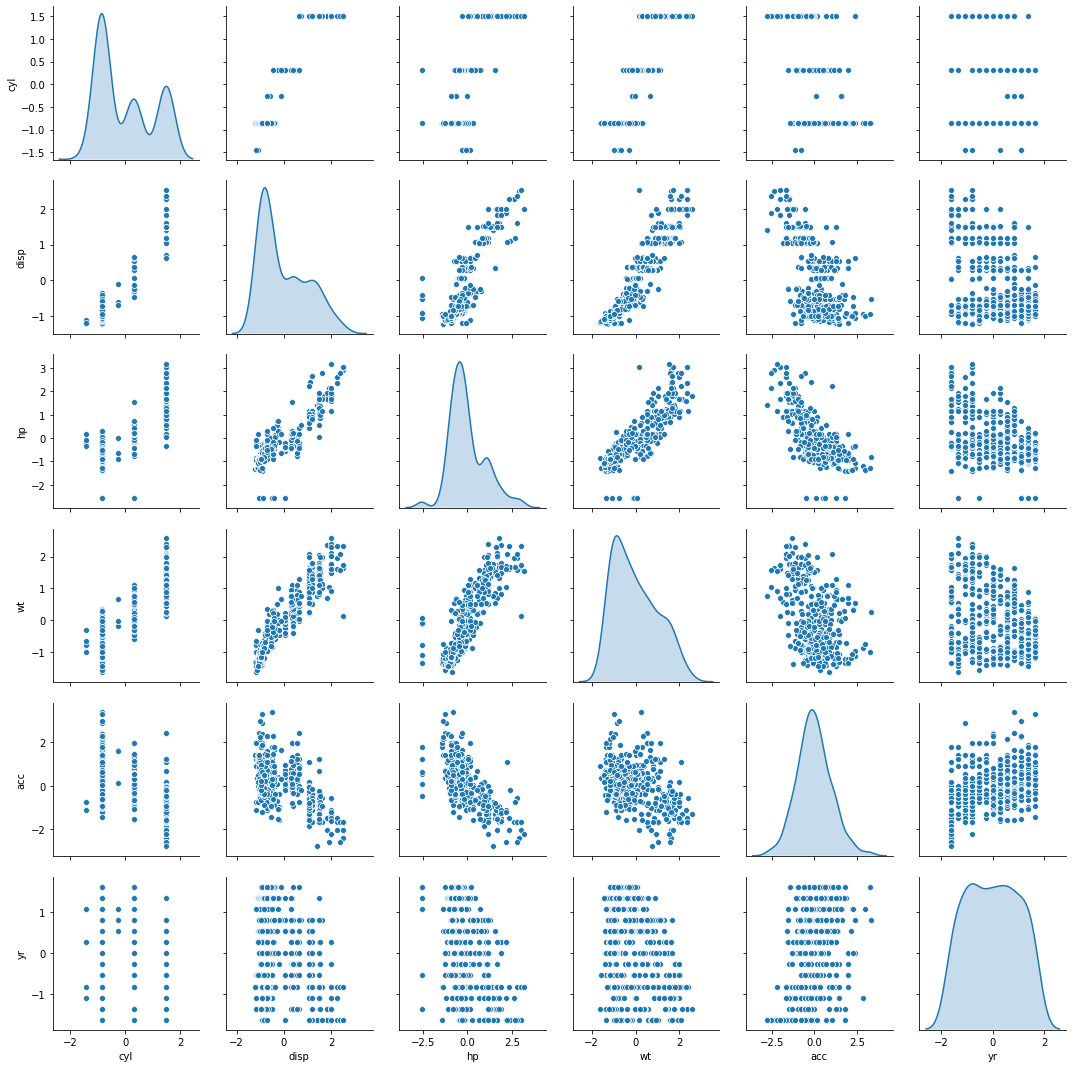

In [68]:
sns.pairplot(x, diag_kind = "kde")

In [71]:
print(np.cov(x,rowvar= False))

[[ 1.00251889  0.95311615  0.82372609  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.87412357  0.93517383 -0.54505356 -0.37109656]
 [ 0.82372609  0.87412357  1.00251889  0.84009753 -0.6756379  -0.41262421]
 [ 0.89827376  0.93517383  0.84009753  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.6756379  -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41262421 -0.30733654  0.28886274  1.00251889]]


In [72]:
pca = PCA(n_components=6)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [73]:
print(pca.explained_variance_)

[4.23082582 0.84051556 0.67576358 0.15301973 0.07832791 0.03666075]


In [74]:
print(pca.components_)

[[ 0.45654323  0.47019906  0.45817769  0.44695904 -0.32579087 -0.23375681]
 [ 0.18737208  0.16484076  0.00396816  0.26107806  0.21282877  0.90787975]
 [ 0.17104328  0.13508559 -0.13272121  0.27113297  0.86370094 -0.33968922]
 [ 0.55533203  0.20866267 -0.74992689 -0.19587083 -0.21323593 -0.04290622]
 [-0.46105525  0.01601913 -0.4564425   0.72234254 -0.23139541 -0.05923767]
 [-0.45413496  0.8304791  -0.0413816  -0.31370152  0.05976223  0.01932093]]


In [75]:
print(pca.explained_variance_ratio_)

[0.70336593 0.13973395 0.11234428 0.02543921 0.01302185 0.00609477]


<BarContainer object of 6 artists>

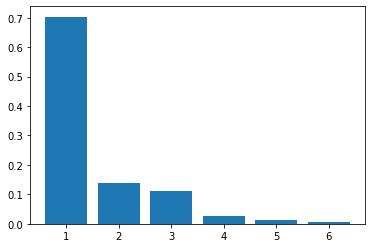

In [77]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_)

In [78]:
pca = PCA(n_components=3)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
pca.explained_variance_

array([4.23082582, 0.84051556, 0.67576358])

In [80]:
pca.explained_variance_ratio_

array([0.70336593, 0.13973395, 0.11234428])

<BarContainer object of 3 artists>

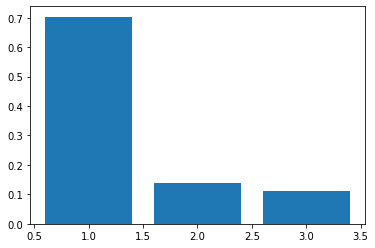

In [83]:
plt.bar(list(range(1,4)),pca.explained_variance_ratio_)

In [84]:
xpca = pca.transform(x)

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=101)
linear_model= LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_pred = linear_model.predict(x_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [88]:
print(linear_model.score(x_train,y_train))
print(linear_model.score(x_test,y_test))

0.8106125156120493
0.8024770501029189


In [89]:
x_train,x_test,y_train,y_test = train_test_split(xpca,y,test_size = 0.3, random_state=101)
linear_model= LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
print(linear_model.score(x_train,y_train))
print(linear_model.score(x_test,y_test))

0.7831263054186866
0.7651933044434907
